Optimization of the Linear Regression Problem using Gradient Descent Algorithm


In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
import os
working_dir = '/content/drive/MyDrive/OTE/OTE-Project'
os.chdir(working_dir)

In [3]:
import os
os.chdir(working_dir)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

Loading the Dataset

In [5]:
df=pd.read_csv('Dataset.csv')


In [6]:
df.head()


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Setting the X and Y Variables



In [7]:
X=df[['TV','radio','newspaper']];
Y=df['sales']

In [8]:
X.shape
Y.shape

(200,)

Standarizing X and Y



In [9]:
Y=np.array((Y-Y.mean())/Y.std())
X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

Implementing Gradient Descent Algorithm

Random Initialization of bias and weights



In [10]:
import random
def initialize(dim):
  b=random.random()
  theta=np.random.rand(dim)
  return b,theta

In [11]:
b,theta=initialize(3)
print("Bias: ",b,"Weights: ",theta)

Bias:  0.37323381609712447 Weights:  [0.70425373 0.6917335  0.47886115]


Prediction of the Y Values from bias and Weights



In [12]:
def predict_Y(b,theta,X):
  return b + np.dot(X,theta)

In [13]:
b,theta=initialize(3)
Y_hat=predict_Y(b,theta,X)

In [14]:
Y_hat[0:10]


array([ 1.48185546,  0.80038403,  0.98335663,  1.28900226,  0.36301077,
        1.06785354,  0.57519535,  0.32723685, -0.69579922,  0.06421493])

Calculating the Cost Function MSE



In [15]:
import math
def get_cost(Y,Y_hat):
  Y_resd=Y-Y_hat
  return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)

### Calculating the Cost Function MAE

In [16]:
import math
def get_MAE(Y,Y_hat):
  Y_resd=Y-Y_hat
  S=abs(Y_resd)
  return np.sum((S))/len(Y-Y_resd)

In [17]:
b,theta=initialize(3)
Y_hat=predict_Y(b,theta,X)
get_cost(Y,Y_hat)

0.42025946367658484

Update Bias and Weights

In [18]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
  db=(np.sum(y_hat-y)*2)/len(y)
  dw=(np.dot((y_hat-y),x)*2)/len(y)
  b_1=b_0-learning_rate*db
  theta_1=theta_o-learning_rate*dw
  return b_1,theta_1

In [19]:
b,theta=initialize(3)
print("After initialization -Bias: ",b,"theta: ",theta)
Y_hat=predict_Y(b,theta,X)
b,theta=update_theta(X,Y,Y_hat,b,theta,0.01)
print("After first update -Bias: ",b,"theta: ",theta)

After initialization -Bias:  0.3331949353012694 theta:  [0.93346906 0.41297763 0.11356371]
After first update -Bias:  0.326531036595244 theta:  [0.92988084 0.41440783 0.11188454]


Finding the Optimal Bias and Weights



In [20]:
def run_gradient_descent(X,
                         Y,
                         alpha=0.01,
                         num_iterations=100):
  b,theta=initialize(X.shape[1])
  iter_num=0
  gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
  result_idx=0

  for each_iter in range(num_iterations):
    Y_hat=predict_Y(b,theta,X)
    this_cost=get_cost(Y,Y_hat)

    prev_b=b
    prev_theta=theta
    b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)

    if(iter_num%10==0):
      gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
      result_idx=result_idx+1
    iter_num +=1
  print("Final Estimate of b and theta : ",b,theta)

  return gd_iterations_df,b,theta

In [21]:
gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=200)

Final Estimate of b and theta :  0.2719768810763565 [0.69164886 0.45968293 0.1328277 ]


In [22]:
gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.5,num_iterations=200)

Final Estimate of b and theta :  -2.9976021664879475e-17 [ 0.75306591  0.53648155 -0.00433069]


In [23]:
gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=200)

Final Estimate of b and theta :  0.01437620718622114 [0.73784154 0.50029334 0.03750281]


In [24]:
gd_iterations_df[0:10]

,iteration,cost
0,0.0,1.804985
1,10.0,1.274319
2,20.0,0.912538
3,30.0,0.664950
4,40.0,0.494838
5,50.0,0.377473
6,60.0,0.296152
7,70.0,0.239554
8,80.0,0.199978
9,90.0,0.172172


Plotting the Cost Function Against the Iterations



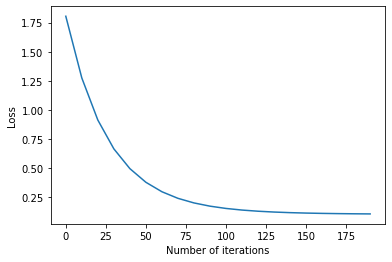

In [25]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.savefig("MSE_Loss1.png")

In [26]:
alpha_df_1,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=2000)

Final Estimate of b and theta :  -4.2792187750625234e-17 [ 0.75306591  0.53648155 -0.00433069]


In [27]:
alpha_df_3,b,theta=run_gradient_descent(X,Y,alpha=0.5,num_iterations=2000)

Final Estimate of b and theta :  -4.4408920985006264e-17 [ 0.75306591  0.53648155 -0.00433069]


In [28]:
alpha_df_2,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=2000)

Final Estimate of b and theta :  0.009448735814362194 [0.74854462 0.50538553 0.03231521]


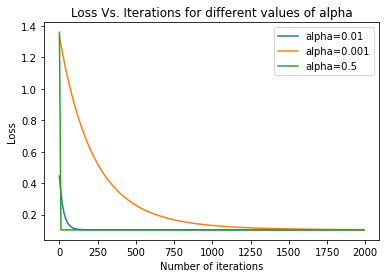

In [29]:
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label="alpha=0.01")
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label="alpha=0.001")
plt.plot(alpha_df_3['iteration'],alpha_df_3['cost'],label="alpha=0.5")
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Number of iterations')
plt.title('Loss Vs. Iterations for different values of alpha')
plt.savefig("MSE_Alpha_Comparison.png")

So, here 0.01 is the optimum value as it takes less iterations to converge. 0.001 takes around a 1000 iterations to converge the cost value.

